# Ejercicio 14

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

# Bootstrapping

Una parte central de cualquier modelo estadístico es poder calcular la incertidumbre asociada a sus parámetros.
En los métodos MCMC las incertidumbres se pueden calcular numéricamente. ¿Pero qué hacer con otros métodos que no son Bayesianos?

Una de las posibilidades es utilizar el bootstrap. El poder de este método es que es aplicable cuando no hay herramientas analíticas
disponibles. Además es muy fácil de implementar. En el bootstrap se toman los datos originales y se toman subconjuntos de manera
aleatoria. Cada uno de estos subconjuntos se procesa bajo el método de interés. De esta manera, para cada subconjunto de datos
hay unos parámetros estimados. Al final se hacen los histogramas de los parámetros obtenidos de los diferentes conjuntos y estos
van a dar una idea de las incertidumbres.

Esto proceso no es necesario con un método como mínimos cuadrados porque para este método
ya hay estimadores para las incertidumbres, de todas formas vamos a utilizarlo para demostrar el uso de bootstraping.

Vamos a volver a los datos de precios de carros.

In [2]:
data = pd.read_csv('Cars93.csv')

Vamos a ajustar el modelo lineal `Price` = $\beta_0$ + $\beta_1\times$ `Horsepower` + $\beta_2\times$ `Turn.circle`

In [3]:
X = data[['Horsepower', 'Turn.circle']]
Y = data['Price'].values.reshape(-1,1)

Ahora vamos a dividir los datos en 2 grupos: `test` y `validation`. Para eso usamos `sklearn.model_selection.train_test_split`

In [5]:
import sklearn.model_selection

In [6]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

`train` vamos a usarlo para encontrar los $\beta_i$ y `validation` para medir $R^2$. 

In [7]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, Y_train)
beta0 = linear.intercept_[0]
beta1 = linear.coef_[0][0]
beta2 = linear.coef_[0][0]
r2_train = linear.score(X_train, Y_train)
r2_validation = linear.score(X_validation, Y_validation) 
print('betas:', beta0, beta1, beta2)
print('R2 (train vs. validation)', r2_train, r2_validation)

betas: 7.491654708433277 0.15574523519118322 0.15574523519118322
R2 (train vs. validation) 0.6610274177220113 0.5418150788037033


Esto lo podemos repetir muchas veces

In [8]:
for i in range(10):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta0 = linear.intercept_[0]
    beta1 = linear.coef_[0][0]
    beta2 = linear.coef_[0][0]
    r2_train = linear.score(X_train, Y_train)
    r2_validation = linear.score(X_validation, Y_validation) 
    print('ITERACION ', i)
    print('\t betas:', beta0, beta1, beta2)
    print('\t R2 (train vs. validation)', r2_train, r2_validation)

ITERACION  0
	 betas: 0.0036747391918652283 0.14509531806411607 0.14509531806411607
	 R2 (train vs. validation) 0.8022200836290826 0.48905382204356446
ITERACION  1
	 betas: 0.24530364886737033 0.1396189284070378 0.1396189284070378
	 R2 (train vs. validation) 0.7841619124540287 0.5065468321723094
ITERACION  2
	 betas: 0.18319460034867774 0.1328584022726661 0.1328584022726661
	 R2 (train vs. validation) 0.5937344437482861 0.6307290060121307
ITERACION  3
	 betas: 6.591721385953205 0.1622674459725117 0.1622674459725117
	 R2 (train vs. validation) 0.6484627472723299 0.5841748350205005
ITERACION  4
	 betas: 10.948212159407333 0.15798064977303197 0.15798064977303197
	 R2 (train vs. validation) 0.5215026909278185 0.7417804930951306
ITERACION  5
	 betas: -11.237055166530354 0.13620849379652497 0.13620849379652497
	 R2 (train vs. validation) 0.6945679469662878 0.543844752641408
ITERACION  6
	 betas: 11.578066072744058 0.18358472827542516 0.18358472827542516
	 R2 (train vs. validation) 0.62593596

Hecho de una manera más sistemática y para tener la posibilidad de preparar gráficas, vamos a hacerlo `5000` veces

In [9]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 

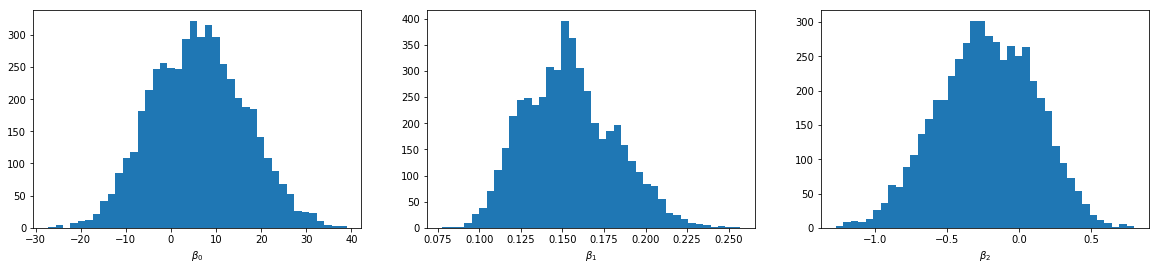

In [10]:
plt.figure(figsize=(20,4))

plt.subplot(131)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(132)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(133)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')


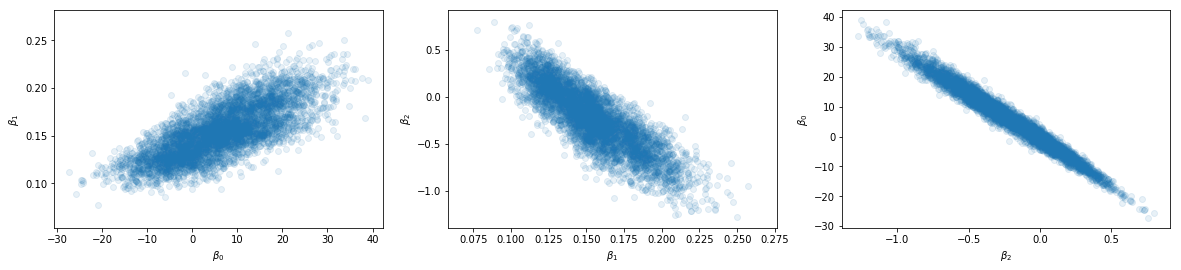

In [11]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.scatter(beta_0, beta_1, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_1$')

plt.subplot(132)
plt.scatter(beta_1, beta_2, alpha=0.1)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(133)
plt.scatter(beta_2, beta_0, alpha=0.1)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_0$')

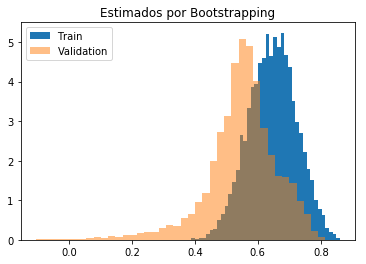

In [12]:
_ = plt.hist(r2_train, bins=40, density=True, label='Train')
_ = plt.hist(r2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

Y de esta manera podemos estimar los valores medios de los parámetros

In [13]:
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))

beta 0 6.1043915426755255 +/- 10.327740132082946
beta 1 0.15420346787351816 +/- 0.02713728061575344
beta 2 -0.22539258050466346 +/- 0.33647890990393037


Y entonces, que diferencias hay entre training, validation and test?

- training: datos para encontrar los parámetros del modelo, dado un método estadístico. En este caso los beta del modelo lineal (modelo) con mínimos cuadrados (método).
- validation: datos para tomar decisiones sobre el método estadístico y, en algunos casos, el modelo mismo. 
- test: datos independientes para medir el rendimiento de un modelo y un método estadístico determinado.

# Ejercicio 7.1

Haga un ejercicio de bootstrap sobre el modelo lineal con variables `Horsepower`, `Turn.circle` y `MPG.highway` para 
estimar los valores medios e incertidumbres. ¿Cuáles de los betas correspondientes son consistentes con cero?

In [14]:
X = data[['Horsepower', 'Turn.circle','MPG.highway']]
Y = data['Price'].values.reshape(-1,1)

In [15]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
beta_3 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    beta_3[i] = linear.coef_[0][2]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 

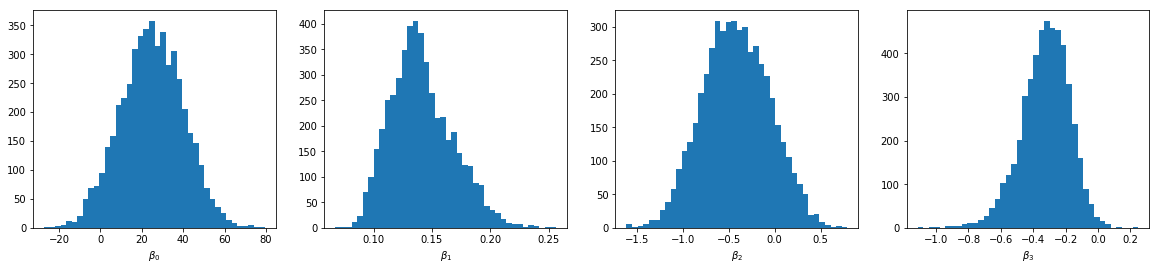

In [16]:
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(beta_3, bins=40)
_ = plt.xlabel(r'$\beta_3$')

De las anteriores gráficas se tiene que los $\beta$ consistentes con cero son:

In [17]:
betas=np.array([beta_0,beta_1,beta_2,beta_3])
for i in range(len(betas)):
    mean=np.mean(betas[i])
    std=np.std(betas[i])
    if np.abs(mean) <= std:
        print('beta_{}'.format(i))

Como no nos arrojó nada el codigo anterior, quiere decir que no se puede ignorar ningun beta

# Ejercicio 7.2

Para el mismo modelo lineal con variables `Horsepower`, `Turn.circle` y `MPG.highway` utilice MCMC para encontrar P(beta|datos).
¿Cómo se relacionan las distribuciones de los beta encontrados con bootstraping y con MCMC? 
¿Cómo se relacionan los valores medios y las incertidumbres?

# Ejercicio 7.3

Construya un modelo lineal del precio como funcion de las siguientes variables.

```
k=['MPG.city', 'MPG.highway', 'EngineSize', 
   'Horsepower', 'RPM', 'Rev.per.mile',
   'Fuel.tank.capacity', 'Passengers', 'Length',
   'Wheelbase', 'Width', 'Turn.circle', 'Weight']
```

¿Cuáles son las beta correspondientes **no** son consistentes con ser cero? ¿Cuál es el modelo lineal que queda luego de descartar
estas variables sin importancia?